# Binomial Model

In [87]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd

**Pricing Options on Non Dividend Paying Stocks**

 Price a European call option with parameters given below:

In [88]:
S0 = 100
T = 0.5
K = 110
r = 0.06
vol = 0.2

Step 1: Build a tree for stock with the parameters

In [89]:
def stock_tree(S0,u,d,n=100):
    # u and d to be selected based on different methods
    tree = []
    
    tree.append(np.array([S0]))
    for i in range(n):
        stock_range = np.concatenate((tree[-1]*u,[tree[-1][-1]*d]))
        tree.append(stock_range)
    return tree

Step 2: Build a tree for Option using the stock tree

In [90]:
def European_call_option_tree(stock_tree,K,T,r,p):
    dt = T/len(stock_tree)
    option_tree = stock_tree.copy()
    payoff = np.maximum(stock_tree[-1]-K,0)
    option_tree[-1] = payoff
    
    for i in range(len(stock_tree)-1,0,-1):
        x = option_tree[i]
        option_tree[i-1] = np.array([(p*x[y]+(1-p)*x[y+1])*m.exp(-r*dt) for y in range(len(x)-1)])
        
    return option_tree
        

Step 3: Get the parameters u,d,p (Many ways to do this. Need to compare to two ways)

$1)$ $u = e^{\sigma\sqrt{dt}}$,&nbsp;   $d = e^{-\sigma\sqrt{dt}}$,&nbsp;   $p = \frac{e^{rdt}-d}{u-d}$ (Refer Hull)

$2)$ $u = (c +\sqrt{c^2-4})/2$,&nbsp; $d = 1/u$,&nbsp; $c = e^{-rdt}+e^{(r+\sigma^2)dt}$,&nbsp; $p = \frac{e^{rdt}-d}{u-d}$ (Refer Wilmott QF)


In [91]:
#parameters estimation
def get_parameters_1(vol,r,T,n):
    dt =T/n
    u = m.exp(vol*(dt**0.5))
    d = m.exp(-vol*(dt**0.5))
    p = (m.exp(r*dt)-d)/(u-d)
    return u,d,p

def get_parameters_2(vol,r,T,n):
    dt =T/n
    c = m.exp(-r*dt)+m.exp((r+vol**2)*dt)
    u = (c+(c**2-4)**0.5)/2
    d = 1/u
    p = (m.exp(r*dt)-d)/(u-d)
    return u,d,p  

In [92]:
a = get_parameters_1(vol,r,T,n=100)

In [93]:
b = get_parameters_2(vol,r,T,n=100)

Both the methods give similar results. Therefore I have chosen 2nd method since the derivation of that method is easier.

Step 4: Estimate the option Price

In [94]:
u,d,p = b
s = stock_tree(S0,u,d,n=100)
print(f'The price of the European call option is {round(European_call_option_tree(s,K,T,r,p)[0][0],2)}')

The price of the European call option is 3.07


Comparing the convergence of option prices for different number of time steps:

In [95]:
n = [x for x in range(100,1001,50)]

In [96]:
call_prices = [European_call_option_tree(stock_tree(S0,get_parameters_2(vol,r,T,i)[0],
                                                      get_parameters_2(vol,r,T,i)[1],i),
                                           K,T,r,get_parameters_2(vol,r,T,i)[2])[0][0]
                for i in n]

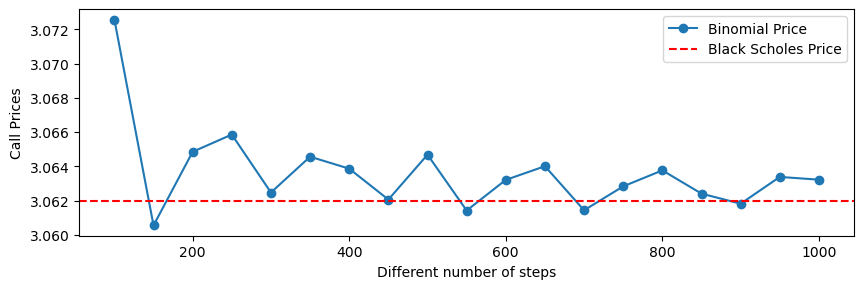

In [97]:
plt.figure(figsize=(10,3),dpi=100)
plt.xlabel('Different number of steps')
plt.ylabel('Call Prices')
plt.plot(n,call_prices,marker='o',label ='Binomial Price')
plt.axhline(y=3.062,color ='r',ls='--',label='Black Scholes Price')
plt.legend()

The option price converges to around 3.063. Black Scholes Price is about 3.062. So the price does converge to the Black scholes Price.

Price a European put option with the same parameters:

In [98]:
def European_put_option_tree(stock_tree,K,T,r,p):
    dt = T/len(stock_tree)
    option_tree = stock_tree.copy()
    payoff = np.maximum(K-stock_tree[-1],0)
    option_tree[-1] = payoff
    
    for i in range(len(stock_tree)-1,0,-1):
        x = option_tree[i]
        option_tree[i-1] = np.array([(p*x[y]+(1-p)*x[y+1])*m.exp(-r*dt) for y in range(len(x)-1)])
        
    return option_tree

In [99]:
u,d,p = b
s = stock_tree(S0,u,d,n=100)
print(f'The price of the European call option is {round(European_put_option_tree(s,K,T,r,p)[0][0],2)}')

The price of the European call option is 9.82


In [100]:
put_prices = [European_put_option_tree(stock_tree(S0,get_parameters_2(vol,r,T,i)[0],
                                                      get_parameters_2(vol,r,T,i)[1],i),
                                           K,T,r,get_parameters_2(vol,r,T,i)[2])[0][0]
                for i in n]

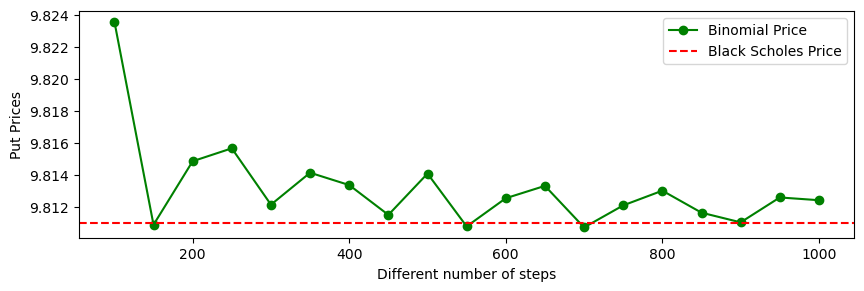

In [101]:
plt.figure(figsize=(10,3),dpi=100)
plt.xlabel('Different number of steps')
plt.ylabel('Put Prices')
plt.plot(n,put_prices,marker='o',color='green',label='Binomial Price')
plt.axhline(y=9.811,color ='r',ls='--',label='Black Scholes Price')
plt.legend()

The option price converges to around 9.813. Black Scholes Price is about 9.811. So the price does converge to the Black scholes Price.

Price an American call & put option with the same parameters:

In [102]:
def American_call_option_tree(stock_tree,K,T,r,p):
    dt = T/len(stock_tree)
    option_tree = stock_tree.copy()
    payoff = np.maximum(stock_tree[-1]-K,0)
    option_tree[-1] = payoff
    
    for i in range(len(stock_tree)-1,0,-1):
        x = option_tree[i]
        option_tree[i-1] = np.maximum([(p*x[y]+(1-p)*x[y+1])*m.exp(-r*dt) for y in range(len(x)-1)],
                                     np.maximum(stock_tree[i-1]-K,0))
        
    return option_tree
        

In [103]:
u,d,p = b
s = stock_tree(S0,u,d,n=100)
print(f'The price of the American call option is {round(American_call_option_tree(s,K,T,r,p)[0][0],2)}')

The price of the American call option is 3.07


The option tree for American call option is same as the European call option. This is expected since the value of the call option is always greater than the intrinsic value.

In [104]:
def American_put_option_tree(stock_tree,K,T,r,p):
    dt = T/len(stock_tree)
    option_tree = stock_tree.copy()
    payoff = np.maximum(K-stock_tree[-1],0)
    option_tree[-1] = payoff
    
    for i in range(len(stock_tree)-1,0,-1):
        x = option_tree[i]
        option_tree[i-1] = np.maximum([(p*x[y]+(1-p)*x[y+1])*m.exp(-r*dt) for y in range(len(x)-1)],
                                     np.maximum(K-stock_tree[i-1],0))
        
    return option_tree
        

In [105]:
u,d,p = b
s = stock_tree(S0,u,d,n=100)
print(f'The price of the American put option is {round(American_put_option_tree(s,K,T,r,p)[0][0],2)}')

The price of the American put option is 10.81


In [106]:
American_put_prices = [American_put_option_tree(stock_tree(S0,get_parameters_2(vol,r,T,i)[0],
                                                      get_parameters_2(vol,r,T,i)[1],i),
                                           K,T,r,get_parameters_2(vol,r,T,i)[2])[0][0]
                       for i in n]

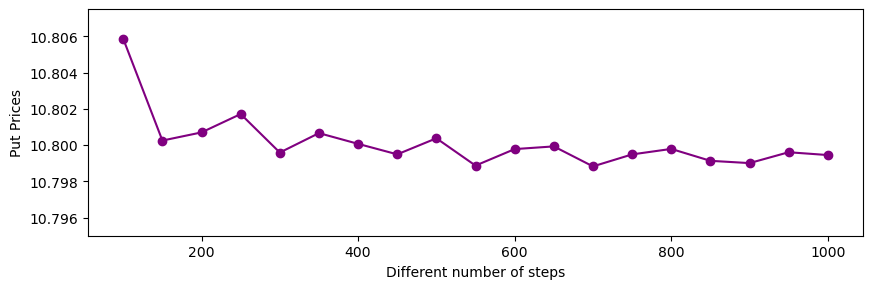

In [107]:
plt.figure(figsize=(10,3),dpi=100)
plt.xlabel('Different number of steps')
plt.ylabel('Put Prices')
plt.ylim(10.795,10.8075)
plt.plot(n,American_put_prices,marker='o',color='purple')

The price converges to 10.8

**Calculate Delta for the different options**

In [108]:
def calculate_delta(option_tree,stock_tree):
    return (option_tree[1][0]-option_tree[1][1])/(stock_tree[1][0]-stock_tree[1][1])

In [109]:
print(f'The delta of the european call option is {round(calculate_delta(European_call_option_tree(s,K,T,r,p),s),4)}')
print(f'The delta of the european put option is {round(calculate_delta(European_put_option_tree(s,K,T,r,p),s),4)}')
print(f'The delta of the american call option is {round(calculate_delta(American_call_option_tree(s,K,T,r,p),s),4)}')
print(f'The delta of the american put option is {round(calculate_delta(American_put_option_tree(s,K,T,r,p),s),4)}')

The delta of the european call option is 0.3475
The delta of the european put option is -0.6528
The delta of the american call option is 0.3475
The delta of the american put option is -0.7569


Plot Delta as a function of the stock price

In [110]:
s1 = [x for x in range(80,151,5)]

In [111]:
Delta_euro_call = [calculate_delta(European_call_option_tree(stock_tree(x,u,d),K,T,r,p),
                  stock_tree(x,u,d)) for x in s1]
Delta_euro_put = [calculate_delta(European_put_option_tree(stock_tree(x,u,d),K,T,r,p),
                  stock_tree(x,u,d)) for x in s1]
Delta_american_put = [calculate_delta(American_put_option_tree(stock_tree(x,u,d),K,T,r,p),
                      stock_tree(x,u,d)) for x in s1]

Text(0.5, 1.0, 'Delta as a function of Stock Price')

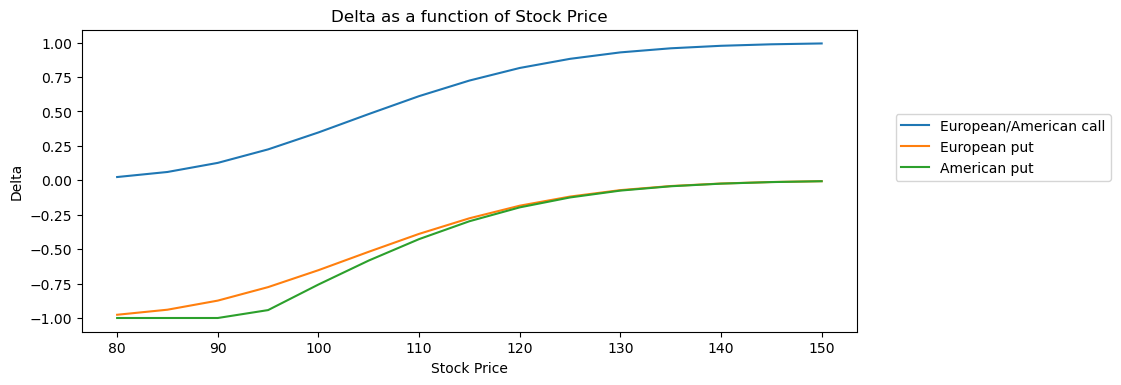

In [112]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(s1,Delta_euro_call,label='European/American call')
plt.plot(s1,Delta_euro_put,label='European put')
plt.plot(s1,Delta_american_put,label='American put')
plt.legend(loc=(1.05,0.5))
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta as a function of Stock Price')

**Calculate Gamma for different options**

In [113]:
def calculate_gamma(option_tree,stock_tree):
    d1 = (option_tree[2][0]-option_tree[2][1])/(stock_tree[2][0]-stock_tree[2][1])
    d2 = (option_tree[2][1]-option_tree[2][2])/(stock_tree[2][1]-stock_tree[2][2])
    return (d1-d2)/((stock_tree[1][0]-stock_tree[1][1]))

In [114]:
print(f'The gamma of the european call option is {round(calculate_gamma(European_call_option_tree(s,K,T,r,p),s),4)}')
print(f'The gamma of the european put option is {round(calculate_gamma(European_put_option_tree(s,K,T,r,p),s),4)}')
print(f'The gamma of the american call option is {round(calculate_gamma(American_call_option_tree(s,K,T,r,p),s),4)}')
print(f'The gamma of the american put option is {round(calculate_gamma(American_put_option_tree(s,K,T,r,p),s),4)}')

The gamma of the european call option is 0.0262
The gamma of the european put option is 0.0262
The gamma of the american call option is 0.0262
The gamma of the american put option is 0.0362


Gamma for European calls and puts is the same

In [115]:
gamma_euro_call = [calculate_gamma(European_call_option_tree(stock_tree(x,u,d),K,T,r,p),
                  stock_tree(x,u,d)) for x in s1]
gamma_euro_put = [calculate_gamma(European_put_option_tree(stock_tree(x,u,d),K,T,r,p),
                  stock_tree(x,u,d)) for x in s1]
gamma_american_put = [calculate_gamma(American_put_option_tree(stock_tree(x,u,d),K,T,r,p),
                      stock_tree(x,u,d)) for x in s1]

Text(0.5, 1.0, 'Gamma as a function of Stock Price')

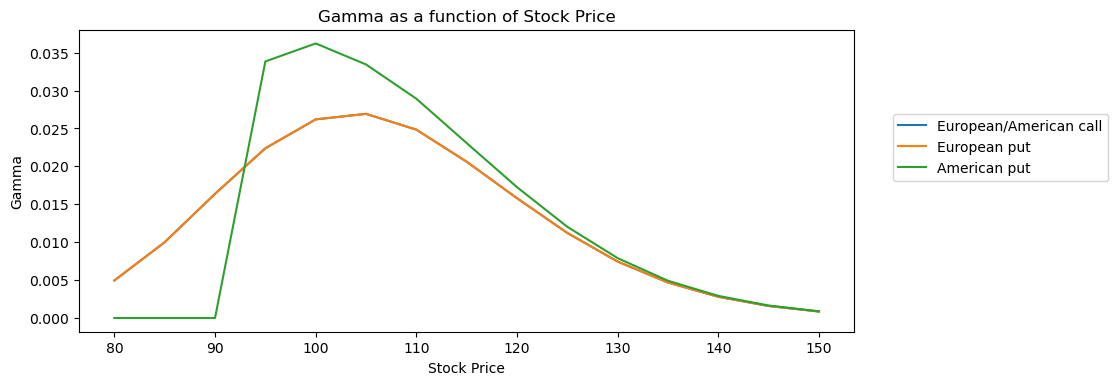

In [116]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(s1,gamma_euro_call,label='European/American call')
plt.plot(s1,gamma_euro_put,label='European put')
plt.plot(s1,gamma_american_put,label='American put')
plt.legend(loc=(1.05,0.5))
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma as a function of Stock Price')

**Calculate the price for Google Stock option and compare it with the market price:**

In [117]:
import pandas_datareader as pdr

In [118]:
goog_data = pdr.DataReader('GOOGL',data_source='yahoo',start = '2020-11-01',end='2021-03-20')

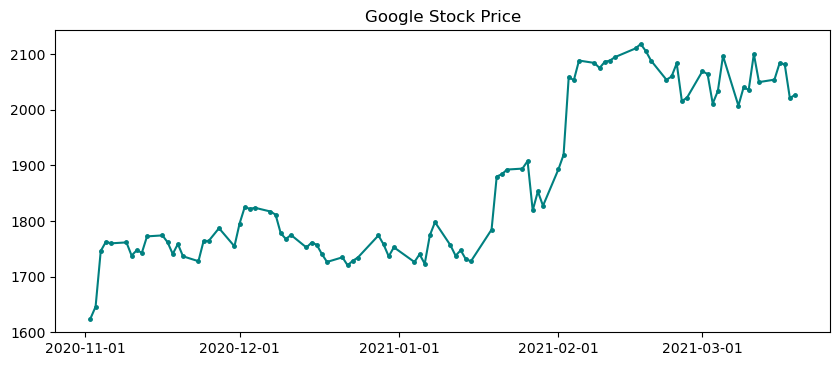

In [119]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(goog_data['Adj Close'],marker='o',markersize=2.5,color='teal')
plt.xticks(['2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01'],
           ['2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01'])
plt.title('Google Stock Price')
plt.show()

In [120]:
goog_prices = np.array(goog_data['Adj Close'])

Step 1: Calculate the volatility as the standard deviation of log returns

In [121]:
goog_vol = np.std(np.log(goog_prices[1:]/goog_prices[:-1]))*(252**0.5)
print(f'The estimate of volatility from historical data is {np.round(goog_vol*100,2)}%')

The estimate of volatility from historical data is 29.36%


In [122]:
S0 = 2020.21 #Current Price of Google as on 3/24/2021
K = 2200 #Arbitrary Strike Price based on market
T = 41/252 #No of Trading days to expire
r = 0.13363/100 #2 month LIBOR Rate taken as the risk free rate

In [123]:
u,d,p = get_parameters_2(goog_vol,r,T,n=41)

In [124]:
American_call_option_tree(stock_tree(S0,u,d,n=41),K,T,r,p)[0]

array([34.61581794])

The call price for a Google option with strike 2200 maturing on May 21 is about 34.62

The market price for the same option as of March 24 is 38.4 which is close but not exact. This means that the implied volatility is almost equal to the historical volatility computed using 90 days of data

Step 2 : Calculating the implied volatility

In [125]:
Actual_price =38.4
err = 1
vol_1 = goog_vol
u,d,p = get_parameters_2(goog_vol,r,T,n=41)
price_1 = American_call_option_tree(stock_tree(S0,u,d,n=41),K,T,r,p)[0]
vol_2 = vol_1+0.2

while np.abs(err)>0.0001:
    u,d,p = get_parameters_2(vol_2,r,T,n=41)
    price_2 = American_call_option_tree(stock_tree(S0,u,d,n=41),K,T,r,p)[0]
    err = price_2 - price_1
    vega = err/(vol_2-vol_1)
    price_1 = price_2
    vol_1 = vol_2
    vol_2 = (Actual_price-price_2)/vega+vol_2

In [126]:
print(f'The implied volatility of the option is {np.round(vol_1[0]*100,3)}%')

The implied volatility of the option is 30.705%


**Pricing Options on Dividend Paying Stocks**

In [127]:
from yahoo_fin import options

In [128]:
from yahoo_fin import stock_info

In [129]:
div = stock_info.get_dividends('AAPL',start_date='2015-01-01')

In [130]:
div['dayofweek'] =pd.Series(div.index,index=div.index).dt.dayofweek

In [131]:
div

,dividend,ticker,dayofweek
2015-02-05,0.1175,AAPL,3
2015-05-07,0.1300,AAPL,3
2015-08-06,0.1300,AAPL,3
2015-11-05,0.1300,AAPL,3
2016-02-04,0.1300,AAPL,3
2016-05-05,0.1425,AAPL,3
2016-08-04,0.1425,AAPL,3
2016-11-03,0.1425,AAPL,3
2017-02-09,0.1425,AAPL,3
2017-05-11,0.1575,AAPL,3


Based on recent data, we can see that Apple is estimated to pay a dividend per share of $0.2050.  
The next ex-dividend date is estimated to be the first friday of May (May 7).

In [132]:
options.get_expiration_dates('AAPL')

['April 9, 2021',
 'April 16, 2021',
 'April 23, 2021',
 'April 30, 2021',
 'May 7, 2021',
 'May 21, 2021',
 'June 18, 2021',
 'July 16, 2021',
 'September 17, 2021',
 'October 15, 2021',
 'January 21, 2022',
 'June 17, 2022',
 'September 16, 2022',
 'January 20, 2023',
 'March 17, 2023',
 'June 16, 2023']

We choose to price an American put Option on Apple expiring at June 18 2021 with a strike price of 160

In [133]:
options_data = options.get_puts('AAPL','2021-06-18')

In [135]:
S0 = 121.39
K =160
T = 56/252 #No of Trading Days to expiry
vol = 40.16/100 #Implied volatility
r = 0.19900/100 # 3 month LIBOR Rate

In [136]:
D = 0.205 # Dividend
td = 39/365 #No of days for the ex-dividend date in years
PV_D = D*np.exp(-r*td) # Present value of dividends

Step 1: Building a stock price for S excluding the present value of dividends

In [137]:
S_bar = S0-PV_D

In [138]:
u,d,p = get_parameters_2(vol,r,T,1000)

In [139]:
S_bar_tree = stock_tree(S_bar,u,d,1000)

Step 2: Adding the dividends at each node

In [140]:
dt = T/1000

In [141]:
S_tree =[]
for i in range(1001):
    if td-i*dt>0:
        S_tree.append(np.array(S_bar_tree[i]+D*np.exp(-r*(td-i*dt))))
    else:
        S_tree.append(S_bar_tree[i])

Step 3: Price the option using the new tree

In [142]:
print(f'The price of the option is {round(American_put_option_tree(S_tree,K,T,r,p)[0][0],2)}')

The price of the option is 39.59


This is higher than the market price. One reason could be that the implied volatility provided by the data provider could be wrongly calculated. Another reason could be that the implied distribution of stock price may not be lognormal.

Step 4: Using the control variate techique

In [143]:
amer_price = American_put_option_tree(S_tree,K,T,r,p)[0][0]

In [144]:
euro_price = European_put_option_tree(S_tree,K,T,r,p)[0][0]

In [145]:
BS_price = 39.55 # Black Scholes Price using formula

In [146]:
print(f'The price of the option is changed to {round(amer_price+(BS_price-euro_price),2)}')

The price of the option is changed to 39.57
